# Imports

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import better_tensorflow as btf

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [12]:
X = np.array([[1, 1], [2, 3], [3, 3]])
Y = np.array([1, -1, -1])

x_mlp = [
    [[1, 1]],
    [[2, 3], [3, 3]],
]

btf.train_rbf(x_mlp, [], [], 1, True, False, "")

print(btf.predict_rbf([1, 1], 0.1, True))  # 0
print(btf.predict_rbf([2, 3], 0.1, True))  # 1
print(btf.predict_rbf([3, 3], 0.1, True))  # 1

1.0
-1.0
-1.0


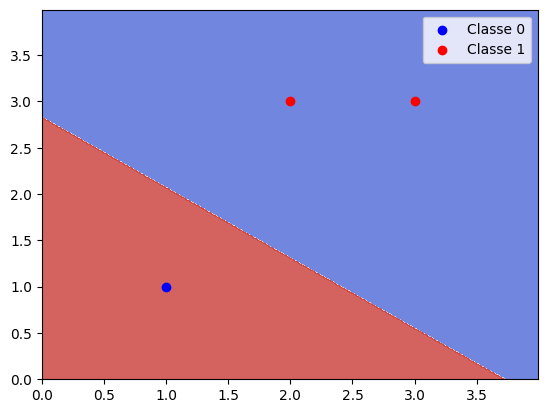

<Figure size 640x480 with 0 Axes>

In [13]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([btf.predict_rbf(point, 0.1, True) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[0, 0], X[0, 1], color="blue", label="Classe 0")
plt.scatter(X[1:3, 0], X[1:3, 1], color="red", label="Classe 1")
plt.legend()
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [14]:
X = np.concatenate(
    [
        np.random.random((50, 2)) * 0.9 + np.array([1, 1]),
        np.random.random((50, 2)) * 0.9 + np.array([2, 2]),
    ]
)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

x_mlp = [[X[0:50, 0], X[0:50, 1]], [X[50:100, 0], X[50:100, 1]]]

x_mlp = [[], []]

for i in range(50):
    x_mlp[0].append([X[i, 0], X[i, 1]])
for i in range(50):
    x_mlp[1].append([X[i + 50, 0], X[i + 50, 1]])

btf.train_rbf(x_mlp, [], [], 0.1, True, False, "")

result = 0
index = 0
for i in range(2):
    for x in x_mlp[i]:
        if btf.predict_rbf(x, 0.1, True) == 1 and index == 0:
            result += 1
        if btf.predict_rbf(x, 0.1, True) == -1 and index == 1:
            result += 1
        index += 1

In [15]:
print(result * 100 / index)

1.0


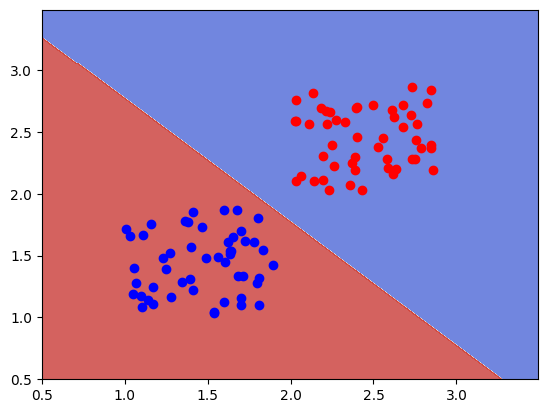

<Figure size 640x480 with 0 Axes>

In [16]:
xx, yy = np.meshgrid(np.arange(0.5, 3.5, 0.01), np.arange(0.5, 3.5, 0.01))
Z = np.array(
    [btf.predict_rbf([x, y], 0.1, True) for x, y in zip(xx.ravel(), yy.ravel())]
)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[0:50, 0], X[0:50, 1], color="blue")
plt.scatter(X[50:100, 0], X[50:100, 1], color="red")
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [17]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

x_mlp = [[[0, 0], [1, 1]], [[1, 0], [0, 1]]]

btf.train_rbf(x_mlp, [], [], 0.1, True, False, "")

print(btf.predict_rbf([1, 1], 0.1, True))  # 0
print(btf.predict_rbf([0, 0], 0.1, True))  # 0
print(btf.predict_rbf([1, 0], 0.1, True))  # 1
print(btf.predict_rbf([0, 1], 0.1, True))  # 1

-1.0
1.0
1.0
1.0


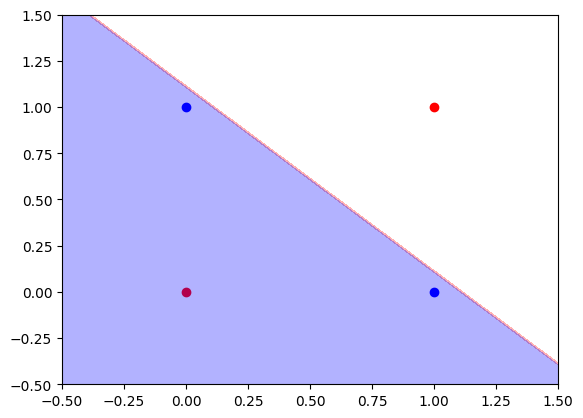

In [18]:
plt.scatter(X[0:2, 0], X[0:2, 1], color="blue")
plt.scatter(X[2:4, 0], X[2:4, 1], color="red")

xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
predictions = np.array([btf.predict_rbf(point, 0.1, True) for point in grid])
predictions = predictions.reshape(xx.shape)

plt.contourf(
    xx, yy, predictions, alpha=0.3, levels=[-0.5, 0.5, 1.5], colors=["red", "blue"]
)
plt.show()

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [19]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])


x_mlp = [[], []]
for i in range(500):
    index = 0 if Y[i] == 1 else 1
    x_mlp[index].append([X[i, 0], X[i, 1]])


btf.train_rbf(x_mlp, [], [], 1, True, False, "")

result = 0
nb = 0
for i in range(2):
    for x in x_mlp[i]:
        if btf.predict_rbf(x, 1, True) == 1 and i == 1:
            result += 1
        elif btf.predict_rbf(x, 1, True) == -1 and i == 0:
            result += 1
        index += 1

In [20]:
print(result * 100 / index)

41.0


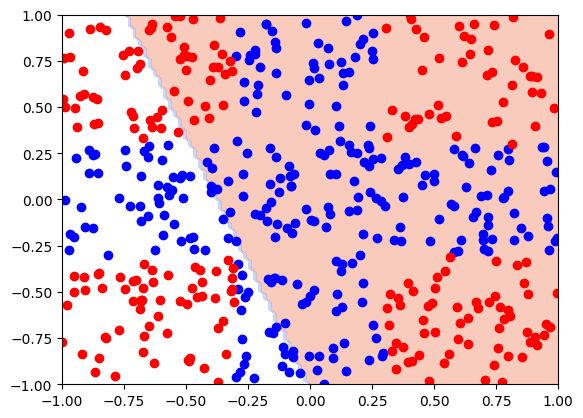

<Figure size 640x480 with 0 Axes>

In [21]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
predictions = np.array([btf.predict_rbf(point, 1, True) for point in grid])
predictions = predictions.reshape(xx.shape)

plt.contourf(
    xx, yy, predictions, alpha=0.5, levels=np.arange(-0.5, 2, 1), cmap="coolwarm"
)

plt.scatter(
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X))))
    )[:, 0],
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X))))
    )[:, 1],
    color="blue",
)
plt.scatter(
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X))))
    )[:, 0],
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X))))
    )[:, 1],
    color="red",
)

plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [22]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array(
    [
        [1, 0, 0]
        if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0
        else [0, 1, 0]
        if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0
        else [0, 0, 1]
        if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0
        else [0, 0, 0]
        for p in X
    ]
)

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

x_mlp = [[], [], []]
for i in range(len(X)):
    index = 0
    for y in range(len(Y[i])):
        if Y[i][y] == 1:
            index = y
    x_mlp[index].append([X[i, 0], X[i, 1]])


btf.train_rbf(x_mlp, [], [], 1, True, False, "")

result = 0
nb = 0
for i in range(2):
    for x in x_mlp[i]:
        if btf.predict_rbf(x, 1, True) == i:
            result += 1
        index += 1

In [23]:
print(result * 100 / index)

0.9202453987730062


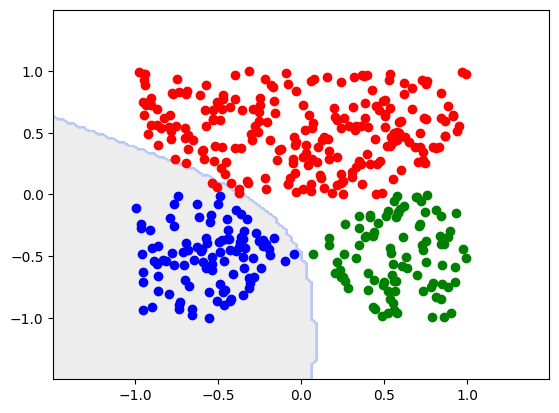

<Figure size 640x480 with 0 Axes>

In [24]:
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100),
)
Z = np.array([btf.predict_rbf([x, y], 1, True) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, levels=np.arange(-0.5, 3, 1), cmap="coolwarm")
plt.scatter(
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X))))
    )[:, 0],
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X))))
    )[:, 1],
    color="blue",
)
plt.scatter(
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X))))
    )[:, 0],
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X))))
    )[:, 1],
    color="red",
)
plt.scatter(
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X))))
    )[:, 0],
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X))))
    )[:, 1],
    color="green",
)
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [25]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array(
    [
        [1, 0, 0]
        if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25
        else [0, 1, 0]
        if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25
        else [0, 0, 1]
        for p in X
    ]
)


x_mlp = [[], [], []]
for i in range(len(X)):
    index = 0
    for y in range(len(Y[i])):
        if Y[i][y] == 1:
            index = y
    x_mlp[index].append([X[i, 0], X[i, 1]])


btf.train_rbf(x_mlp, [], [], 1, True, False, "")

result = 0
nb = 0
for i in range(2):
    for x in x_mlp[i]:
        if btf.predict_rbf(x, 1, True) == i:
            result += 1
        index += 1

In [26]:
print(result * 100 / index)

0.0


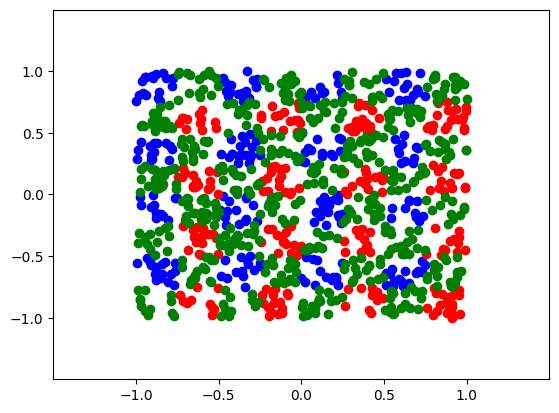

<Figure size 640x480 with 0 Axes>

In [27]:
plt.scatter(
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X))))
    )[:, 0],
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X))))
    )[:, 1],
    color="blue",
)
plt.scatter(
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X))))
    )[:, 0],
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X))))
    )[:, 1],
    color="red",
)
plt.scatter(
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X))))
    )[:, 0],
    np.array(
        list(map(lambda elt: elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X))))
    )[:, 1],
    color="green",
)

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100),
)
Z = np.array([btf.predict_rbf([x, y], 1, True) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(-0.5, 3, 1), cmap="coolwarm")
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [28]:
X = np.array([[1], [2]])
Y = np.array([2, 3])

x_mlp = [[[1]], [[2]]]

btf.train_rbf(x_mlp, [], Y, 1, True, False, "")

print(btf.predict_rbf([1], 1, False))  # 2
print(btf.predict_rbf([2], 1, False))  # 3

0.7998303174972534
-0.7998303174972534


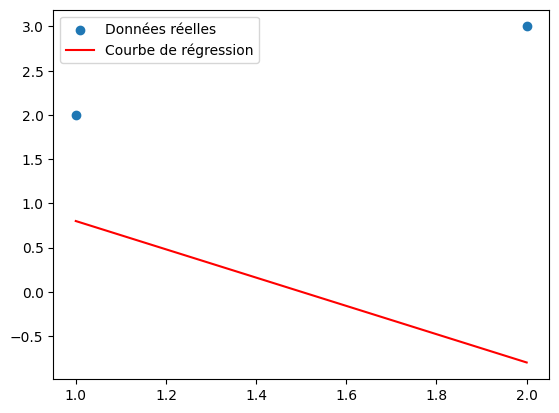

<Figure size 640x480 with 0 Axes>

In [29]:
plt.scatter(X, Y, label="Données réelles")
X_sorted = np.sort(X, axis=0)
Y_pred = np.array([btf.predict_rbf(x, 1, False) for x in X_sorted])
plt.plot(X_sorted, Y_pred, color="red", label="Courbe de régression")
plt.legend()
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [30]:
X = np.array([[1], [2], [3]])
Y = np.array([2, 3, 2.5])

x_mlp = [[[1]], [[2]], [[3]]]

btf.train_rbf(x_mlp, [], Y, 1, True, False, "")

print(btf.predict_rbf([1], 1, False))
print(btf.predict_rbf([2], 1, False))
print(btf.predict_rbf([3], 1, False))

0.8161855340003967
-0.8297494649887085
-0.9957922697067261


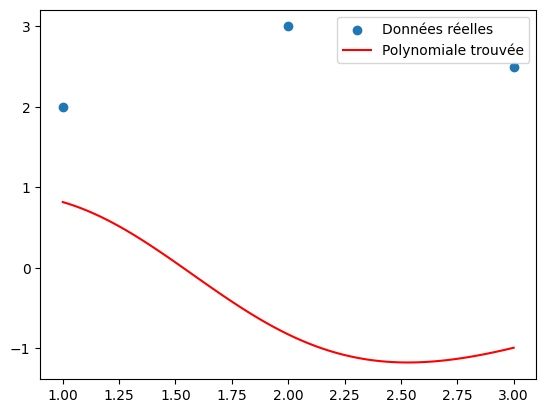

<Figure size 640x480 with 0 Axes>

In [31]:
plt.scatter(X, Y, label="Données réelles")
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_pred_smooth = np.array([btf.predict_rbf(x, 1, False) for x in X_smooth])
plt.plot(X_smooth, Y_pred_smooth, color="red", label="Polynomiale trouvée")
plt.legend()
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [32]:
X = np.array([[1, 1], [2, 2], [3, 1]])
Y = np.array([2, 3, 2.5])

x_mlp = [[[1, 1]], [[2, 2]], [[3, 1]]]

btf.train_rbf(x_mlp, [], Y, 1, True, False, "")

print(btf.predict_rbf([1, 1], 1, False))
print(btf.predict_rbf([2, 2], 1, False))
print(btf.predict_rbf([3, 1], 1, False))

0.8829329609870911
-0.9009392857551575
-0.9290447235107422


In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [34]:
X = np.array([[1, 1], [2, 2], [3, 3]])
Y = np.array([1, 2, 3])

x_mlp = [[[1, 1]], [[2, 2]], [[3, 3]]]

btf.train_rbf(x_mlp, [], Y, 1, True, False, "")

print(btf.predict_rbf([1], 1, False))
print(btf.predict_rbf([2], 1, False))
print(btf.predict_rbf([3], 1, False))

0.6550108790397644
-0.8533360958099365
-1.1303597688674927


In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [36]:
X = np.array(
    [
        [1, 0],
        [0, 1],
        [1, 1],
        [0, 0],
    ]
)
Y = np.array([2, 1, -2, -1])

x_mlp = [[[1, 0]], [[0, 1]], [[1, 1]], [[0, 0]]]

btf.train_rbf(x_mlp, [], Y, 1, True, False, "")

print(btf.predict_rbf([1, 0], 1, False))
print(btf.predict_rbf([0, 1], 1, False))
print(btf.predict_rbf([1, 1], 1, False))
print(btf.predict_rbf([0, 0], 1, False))

0.7033519744873047
-1.0606998205184937
-0.7935564517974854
-0.7935565710067749


In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>